# 비지도학습 과제
### 전처리 2차시에서 진행한 실습에서 이어지는 내용입니다.
### 2차시에서 최종적으로 저장한 hyundi_preprocessed.csv 파일을 활용해 비지도학습 클러스터링을 진행합니다.

### 파일 불러오기

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/hyundi_preprocessed.csv', index_col=0)

In [4]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,7,2017,7999,0,17307,0,145.0,58.9,1.2
1,12,2016,14499,2,25233,2,235.0,43.5,2.0
2,12,2016,11399,0,37877,2,30.0,61.7,1.7
3,5,2016,6499,0,23789,0,20.0,60.1,1.0
4,6,2015,10199,0,33177,2,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4854,15,2019,29995,3,1567,2,145.0,39.8,2.2
4856,9,2015,7830,0,59508,2,30.0,65.7,1.7
4857,5,2017,6830,0,13810,0,20.0,60.1,1.0
4858,12,2018,13994,0,23313,0,145.0,44.8,1.6


In [21]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4849, 4850, 4851, 4852, 4853, 4854, 4856, 4857, 4858, 4859],
           dtype='int64', length=4592)

# 지금부터 df를 활용해 K-means Clustering을 진행하시면 됩니다.
* 다양한 클러스터를 만들며, 클러스터링에 익숙해지는 자유도 높은 과제 입니다.
* 비지도학습 K-means Clustering 강의 및 자료를 활용해 현대 중고차에 대한 클러스터링 분석을 자유롭게 진행해보세요.
* 분석을 위해 모든 열을 다 사용해도 되고, 몇 가지 열을 골라서 진행해도 됩니다!

In [5]:
# 분석을 진행할 열 3개를 가져옵니다.
df_new = df[['price','year','mileage']]

df_new

,price,year,mileage
0,7999,2017,17307
1,14499,2016,25233
2,11399,2016,37877
3,6499,2016,23789
4,10199,2015,33177
...,...,...,...
4854,29995,2019,1567
4856,7830,2015,59508
4857,6830,2017,13810
4858,13994,2018,23313


In [7]:
from sklearn.cluster import KMeans

# KMeans 클러스터링 모델 생성
km = KMeans(n_clusters=3,
            init ='random',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state=0
                    )

# 클러스터링 수행
y_km = km.fit_predict(df_new) # ****부분을 적절한 값으로 교체해주세요.

# 클러스터링 결과 출력
df_new['cluster_label'] = y_km
print(df_new)

      price  year  mileage  cluster_label
0      7999  2017    17307              1
1     14499  2016    25233              0
2     11399  2016    37877              0
3      6499  2016    23789              0
4     10199  2015    33177              0
...     ...   ...      ...            ...
4854  29995  2019     1567              1
4856   7830  2015    59508              2
4857   6830  2017    13810              1
4858  13994  2018    23313              0
4859  15999  2016    11472              1

[4592 rows x 4 columns]


<ipython-input-7-729ad4cf6cf9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cluster_label'] = y_km


In [14]:
y_km

array([1, 0, 0, ..., 1, 0, 1], dtype=int32)

In [8]:
# 클러스터 중심점 확인
centers = km.cluster_centers_  # 중심을 확인하는 코드를 넣어주세요

centers

array([[10729.16575923,  2016.40653358, 29905.9092559 ],
       [14975.66877221,  2018.12791157,  9088.58823529],
       [ 8117.26600985,  2014.00492611, 60669.93103448]])

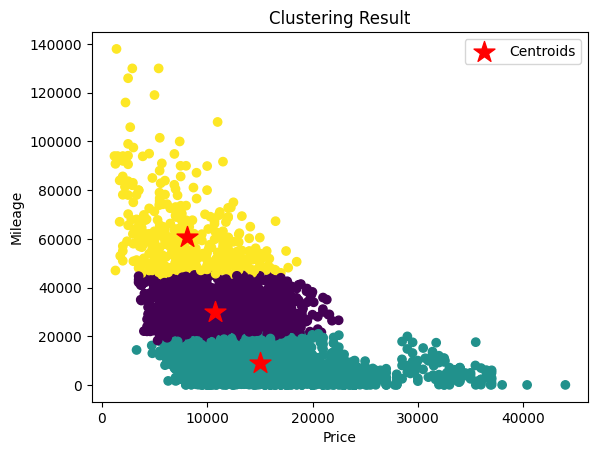

In [16]:
# 클러스터링 결과 시각화
import matplotlib.pyplot as plt

# 4800여개의 데이터를 점 찍는 작업입니다.
plt.scatter(x =df_new.iloc[:,0]  , y = df_new.iloc[:,2]   , c=y_km, cmap='viridis')  # x, y, c에 값을 집어넣어주세요

# 각 cluster의 중심을 점 찍는 작업입니다.
plt.scatter(x= centers[:, 0]   , y= centers[:,2]  , marker='*', s=250, color='red', label='Centroids') # x,y에 값을 집어넣어주세요

plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Clustering Result')
plt.legend()
plt.show()

# 아래부터는 배운 내용을 바탕으로 다양한 cluster 분석을 진행해주세요.

In [18]:
#완전 연결 계층 군집 분석
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,7,2017,7999,0,17307,0,145.0,58.9,1.2
1,12,2016,14499,2,25233,2,235.0,43.5,2.0
2,12,2016,11399,0,37877,2,30.0,61.7,1.7
3,5,2016,6499,0,23789,0,20.0,60.1,1.0
4,6,2015,10199,0,33177,2,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4854,15,2019,29995,3,1567,2,145.0,39.8,2.2
4856,9,2015,7830,0,59508,2,30.0,65.7,1.7
4857,5,2017,6830,0,13810,0,20.0,60.1,1.0
4858,12,2018,13994,0,23313,0,145.0,44.8,1.6


In [19]:
df_new2=df[['price','year','mileage']]
df_new2

,price,year,mileage
0,7999,2017,17307
1,14499,2016,25233
2,11399,2016,37877
3,6499,2016,23789
4,10199,2015,33177
...,...,...,...
4854,29995,2019,1567
4856,7830,2015,59508
4857,6830,2017,13810
4858,13994,2018,23313


In [22]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(
                        pdist(df, metric='euclidean')),
                        columns = df.index, index = df.index)
row_dist

,0,1,2,3,4,5,6,7,8,9,...,4849,4850,4851,4852,4853,4854,4856,4857,4858,4859
0,0.000000,10250.846199,20849.416373,6654.468835,16021.772402,24413.516410,22272.647828,14396.474740,20913.170379,5576.200148,...,3882.203946,982.645144,8456.001329,2642.686792,18255.671121,27047.588854,42201.495773,3689.336049,8486.005301,9901.901885
1,10250.846199,0.000000,13020.103545,8132.139605,9033.430379,18419.743444,16254.931475,5077.084587,13487.585987,4826.926282,...,13699.219487,10361.715812,17626.127696,12742.879916,9972.595717,28288.048797,34918.386531,13760.270694,1987.344673,13842.955606
2,20849.416373,13020.103545,0.000000,14915.827166,4852.529565,6465.151665,4893.768480,8078.364612,1027.313088,16880.298131,...,24729.575129,20434.404568,29225.146314,23468.020412,3078.692092,40795.110588,21923.456571,24496.865249,14793.837894,26802.855647
3,6654.468835,8132.139605,14915.827166,0.000000,10091.790064,17864.428958,15760.859467,10084.354701,14816.058276,6307.271760,...,10381.129707,5952.741385,15013.243787,9029.191880,12713.720661,32340.307057,35743.792116,9984.488119,7511.159261,15555.371347
4,16021.772402,9033.430379,4852.529565,10091.790064,0.000000,9392.226077,7221.760287,4927.315043,4909.102093,12321.238094,...,19903.851805,15589.198847,24425.646515,18631.948709,2934.618916,37297.106880,26437.678332,19658.345192,10568.861751,22466.604762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,27047.588854,28288.048797,40795.110588,32340.307057,37297.106880,46640.055452,44503.352440,32788.712099,41440.905000,26385.218681,...,25444.010150,28030.231832,23174.494245,26351.611308,37736.311702,0.000000,62035.962659,26201.611201,26998.528948,17146.363378
4856,42201.495773,34918.386531,21923.456571,35743.792116,26437.678332,17936.947256,19987.611071,29894.489954,21579.774896,38737.100446,...,46052.326617,41633.926392,50657.399853,44724.599057,24948.032287,62035.962659,0.000000,45708.941793,36716.298899,48725.752550
4857,3689.336049,13760.270694,24496.865249,9984.488119,19658.345192,27848.327867,25737.021198,18061.930980,24533.313593,8963.183701,...,767.551301,4087.699475,5095.540403,1053.700622,21934.185238,26201.611201,45708.941793,0.000000,11901.504714,9462.974941
4858,8486.005301,1987.344673,14793.837894,7511.159261,10568.861751,19945.062333,17757.368964,6990.047915,15200.244656,2941.339936,...,11803.095164,8699.831921,15656.874798,10901.117807,11783.313991,26998.528948,36716.298899,11901.504714,0.000000,12009.574591


In [23]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric = 'euclidean'),
                       method = 'complete')

pd.DataFrame(row_clusters,
             columns = ['row label 1',
                        'row label 2',
                        'distance',
                        'no. of items in clust.'],
             index = ['cluster %d' %(i +1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,2759.0,2833.0,1.000000,2.0
cluster 2,585.0,641.0,1.000000,2.0
cluster 3,992.0,1318.0,1.000000,2.0
cluster 4,2423.0,2503.0,1.000000,2.0
cluster 5,2027.0,2401.0,1.000000,2.0
...,...,...,...,...
cluster 4587,9171.0,9174.0,43757.604031,2578.0
cluster 4588,9172.0,9175.0,47813.995307,1878.0
cluster 4589,9178.0,9179.0,72527.476897,4456.0
cluster 4590,9176.0,9177.0,76918.730183,136.0


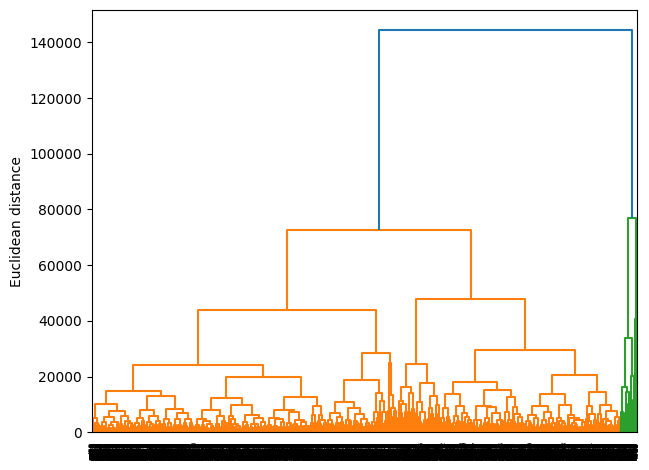

In [25]:
# 연결 행렬을 덴드로그램으로 그리기
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
# 덴드로그램은 색이 다양함.
# 검은색으로 보고싶다면 아래의 코드 주석 해제

# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters,
                       labels = df.index,
                       # color_threshold = np.inf
                       )

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
#price, year의 2차원 k-means clustering 분석

In [26]:
df_new

,price,year,mileage,cluster_label
0,7999,2017,17307,1
1,14499,2016,25233,0
2,11399,2016,37877,0
3,6499,2016,23789,0
4,10199,2015,33177,0
...,...,...,...,...
4854,29995,2019,1567,1
4856,7830,2015,59508,2
4857,6830,2017,13810,1
4858,13994,2018,23313,0


In [27]:
centers

array([[10729.16575923,  2016.40653358, 29905.9092559 ],
       [14975.66877221,  2018.12791157,  9088.58823529],
       [ 8117.26600985,  2014.00492611, 60669.93103448]])

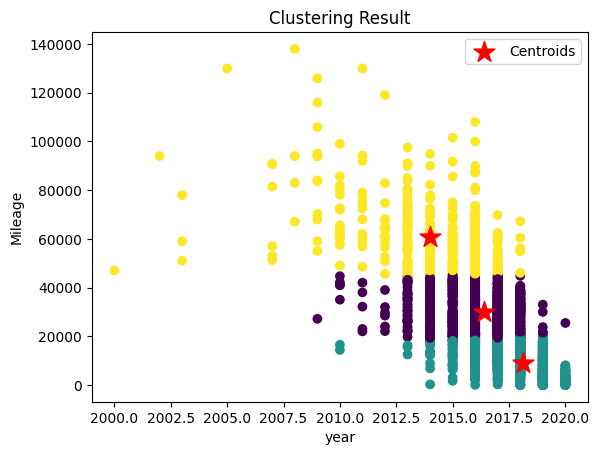

In [31]:
# 클러스터링 결과 시각화
import matplotlib.pyplot as plt

# 4800여개의 데이터를 점 찍는 작업입니다.
plt.scatter(x =df_new.iloc[:,1]  , y = df_new.iloc[:,2]   , c=y_km, cmap='viridis')  # x, y, c에 값을 집어넣어주세요

# 각 cluster의 중심을 점 찍는 작업입니다.
plt.scatter(x= centers[:, 1]   , y= centers[:,2]  , marker='*', s=250, color='red', label='Centroids') # x,y에 값을 집어넣어주세요

plt.xlabel('year')
plt.ylabel('Mileage')
plt.title('Clustering Result')
plt.legend()
plt.show()

In [39]:
#price와 engineSize의 k-means clustering 분석
df_new3=df[['price','engineSize']]
df_new3

,price,engineSize
0,7999,1.2
1,14499,2.0
2,11399,1.7
3,6499,1.0
4,10199,2.0
...,...,...
4854,29995,2.2
4856,7830,1.7
4857,6830,1.0
4858,13994,1.6


In [40]:
from sklearn.cluster import KMeans

# KMeans 클러스터링 모델 생성
km = KMeans(n_clusters=3,
            init ='random',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state=0
                    )

# 클러스터링 수행
y_km = km.fit_predict(df_new3) # ****부분을 적절한 값으로 교체해주세요.

# 클러스터링 결과 출력
df_new3['cluster_label'] = y_km
print(df_new3)

      price  engineSize  cluster_label
0      7999         1.2              2
1     14499         2.0              0
2     11399         1.7              2
3      6499         1.0              2
4     10199         2.0              2
...     ...         ...            ...
4854  29995         2.2              1
4856   7830         1.7              2
4857   6830         1.0              2
4858  13994         1.6              0
4859  15999         1.7              0

[4592 rows x 3 columns]


<ipython-input-40-623bad9d1542>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new3['cluster_label'] = y_km


In [41]:
# 클러스터 중심점 확인
centers = km.cluster_centers_  # 중심을 확인하는 코드를 넣어주세요

centers

array([[1.51572213e+04, 1.60822335e+00],
       [2.55280969e+04, 1.84008811e+00],
       [8.07878598e+03, 1.27015683e+00]])

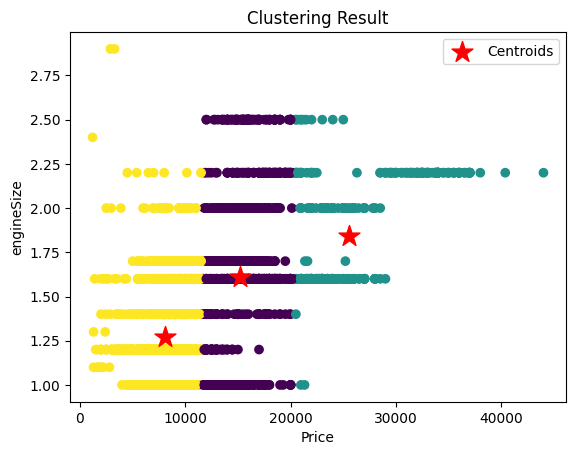

In [43]:
# 클러스터링 결과 시각화
import matplotlib.pyplot as plt

# 4800여개의 데이터를 점 찍는 작업입니다.
plt.scatter(x =df_new3.iloc[:,0]  , y = df_new3.iloc[:,1]   , c=y_km, cmap='viridis')  # x, y, c에 값을 집어넣어주세요

# 각 cluster의 중심을 점 찍는 작업입니다.
plt.scatter(x= centers[:, 0]   , y= centers[:,1]  , marker='*', s=250, color='red', label='Centroids') # x,y에 값을 집어넣어주세요

plt.xlabel('Price')
plt.ylabel('engineSize')
plt.title('Clustering Result')
plt.legend()
plt.show()